In [1]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import textwrap

In [2]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

In [3]:
rose='u-dg767'
ANCILLARY_DIR= HOME / 'cylc-run' / rose / 'share/data/ancils/Gippsland'

In [4]:
# Resolution directoryes
ERA_DIR = ANCILLARY_DIR / 'era5/'
D1000_DIR = ANCILLARY_DIR / 'd1000/'
D0198_DIR = ANCILLARY_DIR / 'd0198/'

In [5]:
# We need to import ants to read in UM file formats
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [6]:
# Plot the land sea mask and fractions files
MASK_FILE_ERA = ERA_DIR / 'qrparm.mask'
MASK_FILE_D1000 = D1000_DIR / 'qrparm.mask'
MASK_FILE_D0198 = D0198_DIR / 'qrparm.mask'

In [13]:
mask_cube_era = ants.load(MASK_FILE_ERA)
mask_cube_d1000 = ants.load(MASK_FILE_D1000)
mask_cube_d0198 = ants.load(MASK_FILE_D0198)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [14]:
mask_cube_era

[<iris 'Cube' of land_binary_mask / (1) (latitude: 400; longitude: 470)>]

In [15]:
mask_cube_d0198

[<iris 'Cube' of land_binary_mask / (1) (latitude: 450; longitude: 450)>]

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


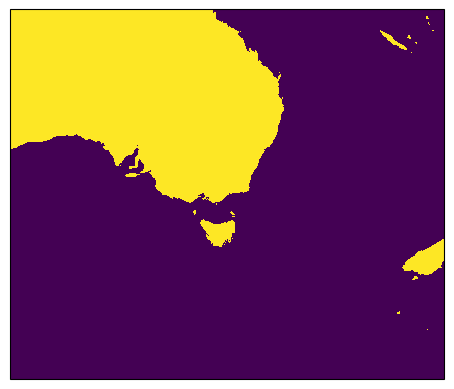

In [11]:
iris.plot.pcolormesh(mask_cube_era[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


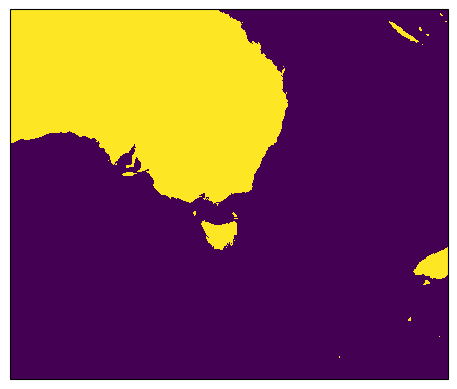

In [17]:
iris.plot.pcolormesh(mask_cube_d1000[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:1978: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


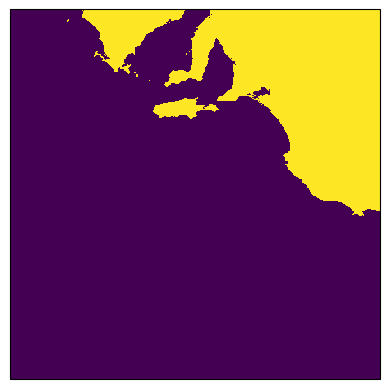

In [16]:
iris.plot.pcolormesh(mask_cube_d0198[0])

In [27]:
# Convert these masks to data arrays
lbm_era = xr.DataArray.from_iris(mask_cube_era[0])
#lbm_era = xr.DataArray.from_iris(mask_cube_era[1])

lbm_d0198 = xr.DataArray.from_iris(mask_cube_d0198[0])
#lbm_d0198 = xr.DataArray.from_iris(mask_cube_d0198[1])

# Load orography
ERA_OROG_FILE = ERA_DIR / 'qrparm.orog.mn'
D0198_OROG_FILE = D0198_DIR / 'qrparm.orog.mn'

era_orog_cube = ants.load(ERA_OROG_FILE)
d0198_orog_cube = ants.load(D0198_OROG_FILE)

orog_era = xr.DataArray.from_iris(era_orog_cube[0])
orog_d0198 = xr.DataArray.from_iris(d0198_orog_cube[0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [18]:
# Quick logic to check all ancil files.
all_files = list(ERA_DIR.glob('qrparm*'))

# Filer out symlinks
files = []
[ files.append(f) for f in all_files if not f.is_symlink() ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
# Get total list of fields
num_plots = 0
for file in files:
    #print (f'INFO : Loading {file}')
    try:
        cube = ants.load(file)
        #print (cube)
        num_plots = num_plots+len(cube)
    except:
        print (f'ERROR : Unable to open {file}\nERROR : You will have to manually check this file using "xconv" ')
        continue

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1471: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t1 = cftime.datetime(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1504: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t2 = cftime.datetime(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/_ff.py:722: _WarnComboLoadingDefaulting: The stash code m01s00i097 is on a grid 0 which has not been explicitly handled by the fieldsfile loader. Assuming the data i

ERROR : Unable to open /home/548/pag548/cylc-run/u-dg767/share/data/ancils/Gippsland/era5/qrparm.veg.dist
ERROR : You will have to manually check this file using "xconv" 


In [20]:
num_plots

71

In [21]:
def collapse_cube(file,cube):
    """
    Collapse a cube onto lat/lon dimensions via averaging
    """
    collapse_dims = []
    
    for coord in cube.coords():
        if coord not in cube.dim_coords:
            collapse_dims.append(coord.name())
            print (f'For {file.name} {cube.name()} coordinate {coord.name()} will be collapsed')
            
    # Check if time remains
    if 'time' in [ c.name() for c in cube.dim_coords ]: 
        collapse_dims.append('time')
        print (f'For {file.name} variable {cube.name()} coordinate time will be collapsed')
    new_cube = cube.collapsed(collapse_dims,iris.analysis.MEAN)

    return new_cube

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284:

For qrparm.veg.func_igbp canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp canopy_height coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.func_igbp leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp leaf_area_index coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster fi

For qrparm.veg.func canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func variable canopy_height coordinate time will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.func leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func variable leaf_area_index coordinate time will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Field

ERROR : Unable to open /home/548/pag548/cylc-run/u-dg767/share/data/ancils/Gippsland/era5/qrparm.veg.dist


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.frac.urb2t m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/publ

For qrparm.veg.frac_igbp m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.frac_cci_pre_c4 m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


For qrparm.veg.frac_cci m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


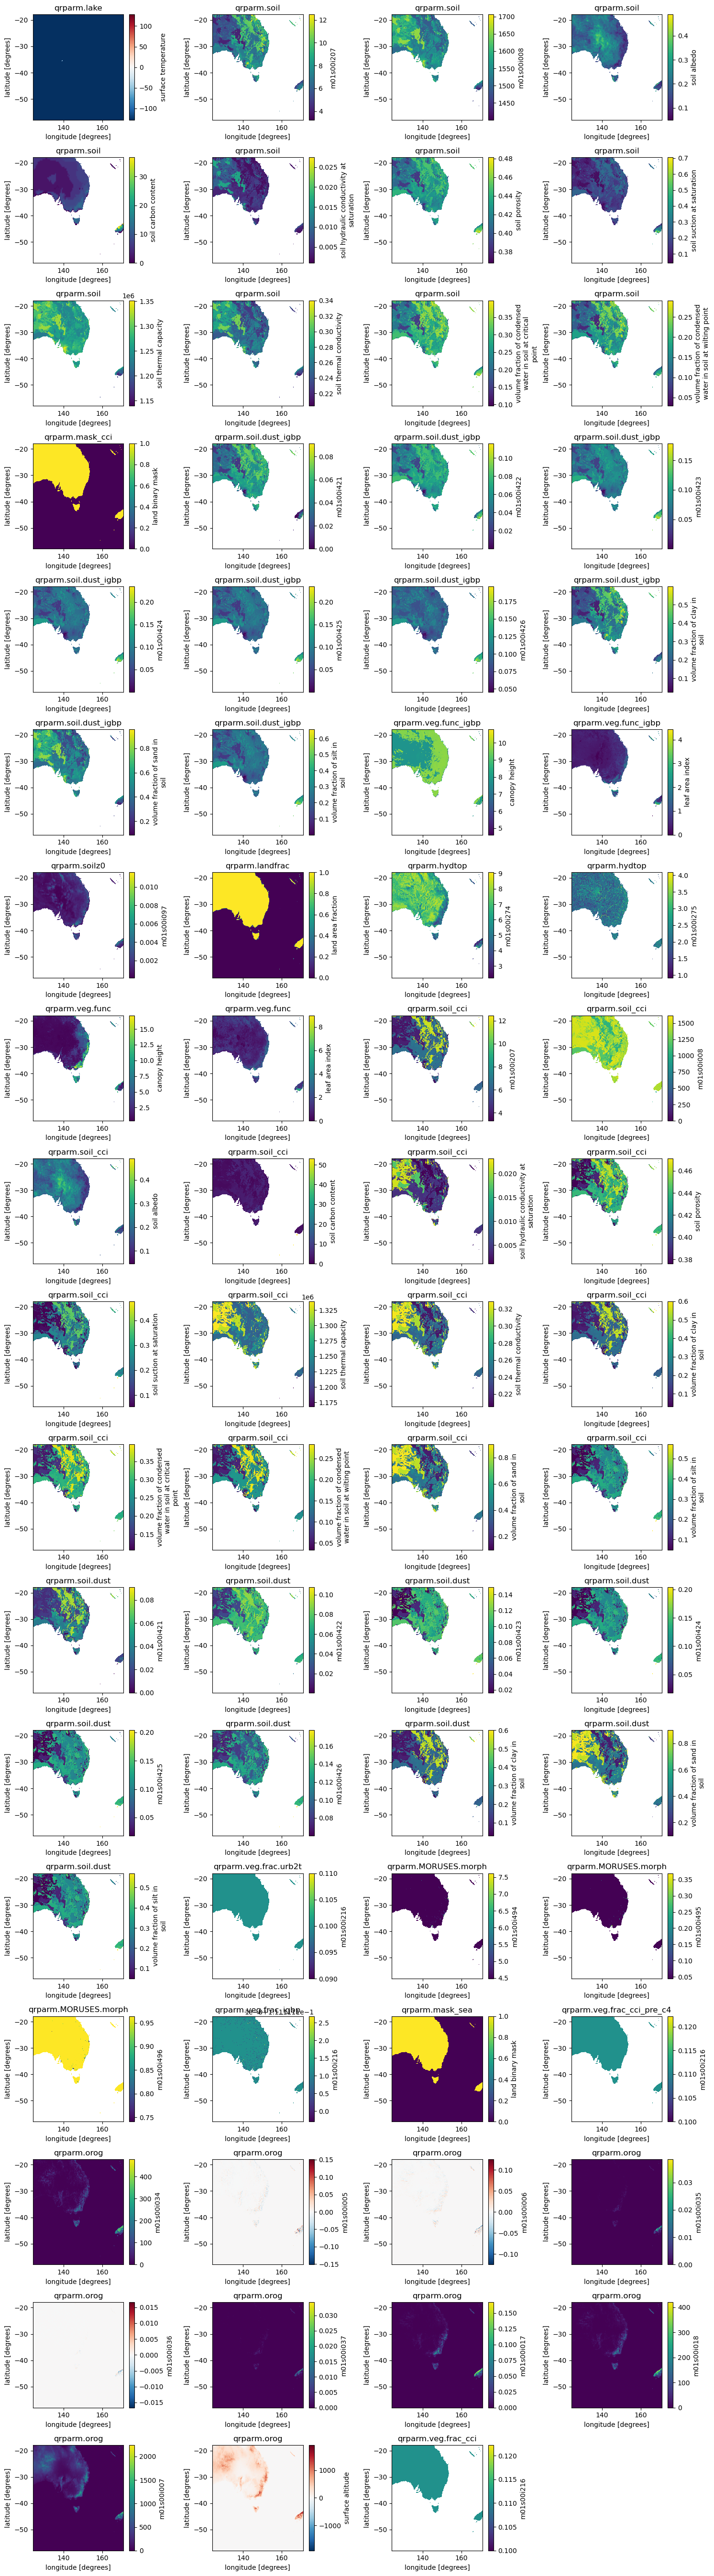

In [22]:
num_columns=4
num_rows = num_plots // num_columns

if num_plots % num_columns != 0:
    num_rows += 1

Position = range(1,num_plots+1)

fig_height = num_rows*3
fig_width = 15
max_label_length=30

fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])

        if len(cube.shape) > 2: 
            # Need to reduce dimension
            cube = collapse_cube(file,cube)
            
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            split = textwrap.wrap(da.attrs['standard_name'].replace('_',' '),max_label_length)
            label = '\n'.join(split)
            cb_args = {'label': label}
        else:
            cb_args = {'label':da.attrs['STASH']}

        da.plot(ax=ax,cbar_kwargs=cb_args)
        ax.set_title(file.name)
        k += 1
plt.tight_layout()

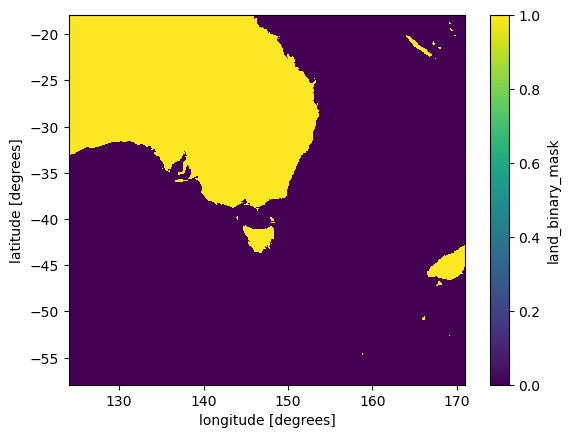

In [28]:
# Search for NaNs outside of the ocean, i.e. where lbm=0
sea_mask = (lbm_era == 1)
sea_mask.plot()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


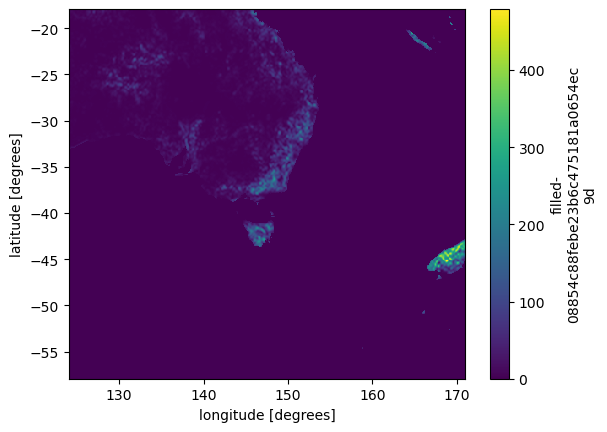

In [23]:
cube=iris.load(files[-2])
cube
da = xr.DataArray.from_iris(cube[0])
da.plot(vmin=0)

In [52]:
# Test with some nans
da[120:130,440:450] = np.nan

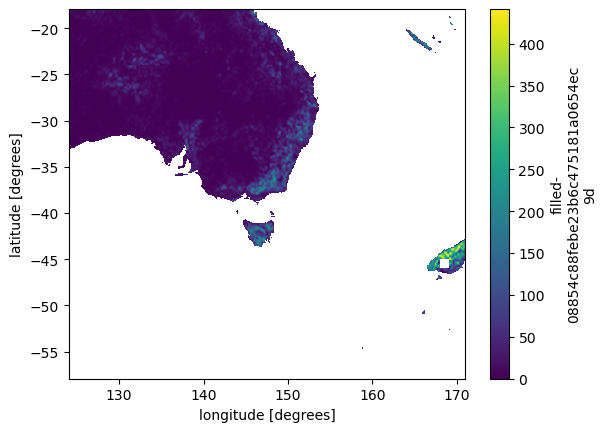

In [53]:
da.where(sea_mask).plot(vmin=0)

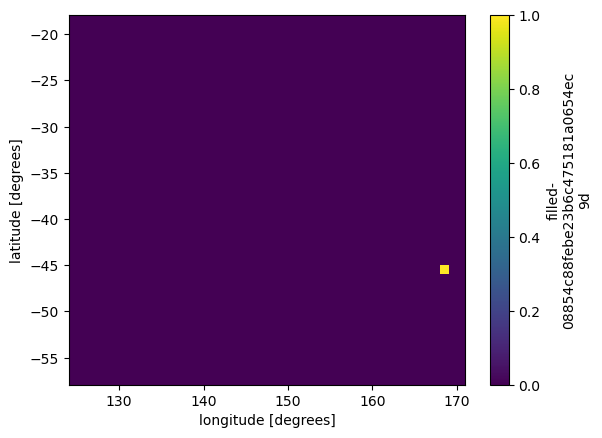

In [54]:
da.isnull().plot()

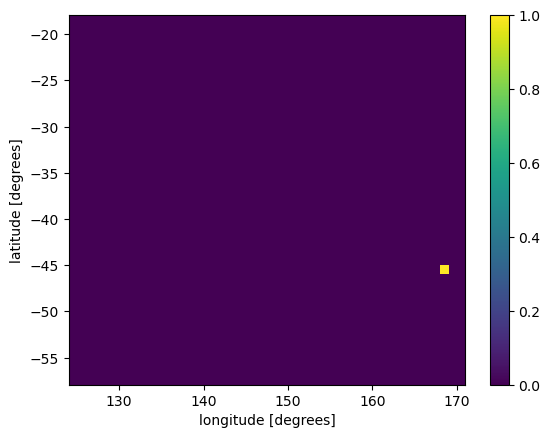

In [82]:
nan_mask = (da.isnull()  & sea_mask)
nan_mask.plot()

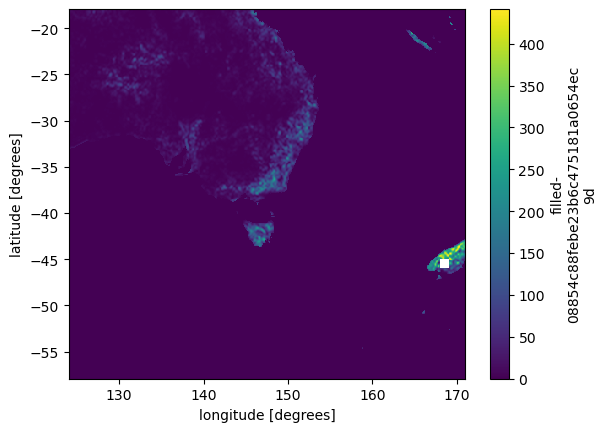

In [56]:
da.where(~nan_mask).plot()

In [68]:
unique = np.unique(da.where(~nan_mask).values)
print (f' da has values {unique}')
np.isnan(unique).any()

 da has values [0.0000000e+00 1.7883321e-03 3.0930436e-03 ... 4.4037103e+02 4.4135480e+02
           nan]


True

In [80]:
test = np.random.rand(10)
print(test)
print (np.isnan(test).any())
test[3] = np.nan
print (test)
print (np.isnan(test).any())

[0.37004982 0.34415154 0.02274368 0.10315057 0.10687105 0.77538317
 0.86442549 0.94904106 0.81509348 0.52546779]
False
[0.37004982 0.34415154 0.02274368        nan 0.10687105 0.77538317
 0.86442549 0.94904106 0.81509348 0.52546779]
True


In [89]:
cube[0].name()

'm01s00i034'

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


m01s00i207 has NaNs on land
m01s00i008 has NaNs on land
soil_albedo has NaNs on land
soil_carbon_content has NaNs on land
soil_hydraulic_conductivity_at_saturation has NaNs on land
soil_porosity has NaNs on land
soil_suction_at_saturation has NaNs on land
soil_thermal_capacity has NaNs on land
soil_thermal_conductivity has NaNs on land
volume_fraction_of_condensed_water_in_soil_at_critical_point has NaNs on land
volume_fraction_of_condensed_water_in_soil_at_wilting_point has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


mass_fraction_of_soil_particles_in_ukmo_division1 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division2 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division3 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division4 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division5 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division6 has NaNs on land
volume_fraction_of_clay_in_soil has NaNs on land
volume_fraction_of_sand_in_soil has NaNs on land
volume_fraction_of_silt_in_soil has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1471: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t1 = cftime.datetime(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1504: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t2 = cftime.datetime(


For qrparm.veg.func_igbp canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp canopy_height coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


canopy_height has NaNs on land
For qrparm.veg.func_igbp leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func_igbp leaf_area_index coordinate month will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'month_number', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'month_number'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


leaf_area_index has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/_ff.py:722: _WarnComboLoadingDefaulting: The stash code m01s00i097 is on a grid 0 which has not been explicitly handled by the fieldsfile loader. Assuming the data is on a P grid.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:28

m01s00i097 has NaNs on land
m01s00i274 has NaNs on land
m01s00i275 has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


For qrparm.veg.func canopy_height coordinate pseudo_level will be collapsed
For qrparm.veg.func variable canopy_height coordinate time will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


canopy_height has NaNs on land
For qrparm.veg.func leaf_area_index coordinate pseudo_level will be collapsed
For qrparm.veg.func variable leaf_area_index coordinate time will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


leaf_area_index has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/fileformats/pp.py:1471: CFWarning: this date/calendar/year zero convention is not supported by CF
  self._t1 = cftime.datetime(


ERROR : Unable to open /home/548/pag548/cylc-run/u-dg767/share/data/ancils/Gippsland/era5/qrparm.veg.dist
m01s00i207 has NaNs on land
m01s00i008 has NaNs on land
soil_albedo has NaNs on land
soil_carbon_content has NaNs on land
soil_hydraulic_conductivity_at_saturation has NaNs on land
soil_porosity has NaNs on land
soil_suction_at_saturation has NaNs on land
soil_thermal_capacity has NaNs on land
soil_thermal_conductivity has NaNs on land
volume_fraction_of_clay_in_soil has NaNs on land
volume_fraction_of_condensed_water_in_soil_at_critical_point has NaNs on land
volume_fraction_of_condensed_water_in_soil_at_wilting_point has NaNs on land
volume_fraction_of_sand_in_soil has NaNs on land
volume_fraction_of_silt_in_soil has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division1 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division2 has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


mass_fraction_of_soil_particles_in_ukmo_division3 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division4 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division5 has NaNs on land
mass_fraction_of_soil_particles_in_ukmo_division6 has NaNs on land
volume_fraction_of_clay_in_soil has NaNs on land
volume_fraction_of_sand_in_soil has NaNs on land
volume_fraction_of_silt_in_soil has NaNs on land
For qrparm.veg.frac.urb2t m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


m01s00i216 has NaNs on land
m01s00i494 has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


m01s00i495 has NaNs on land
m01s00i496 has NaNs on land
For qrparm.veg.frac_igbp m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


m01s00i216 has NaNs on land
For qrparm.veg.frac_cci_pre_c4 m01s00i216 coordinate pseudo_level will be collapsed


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


m01s00i216 has NaNs on land


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/coords.py:2153: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'pseudo_level', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'pseudo_level'. Ignoring bounds.
  warnings.warn(


For qrparm.veg.frac_cci m01s00i216 coordinate pseudo_level will be collapsed
m01s00i216 has NaNs on land


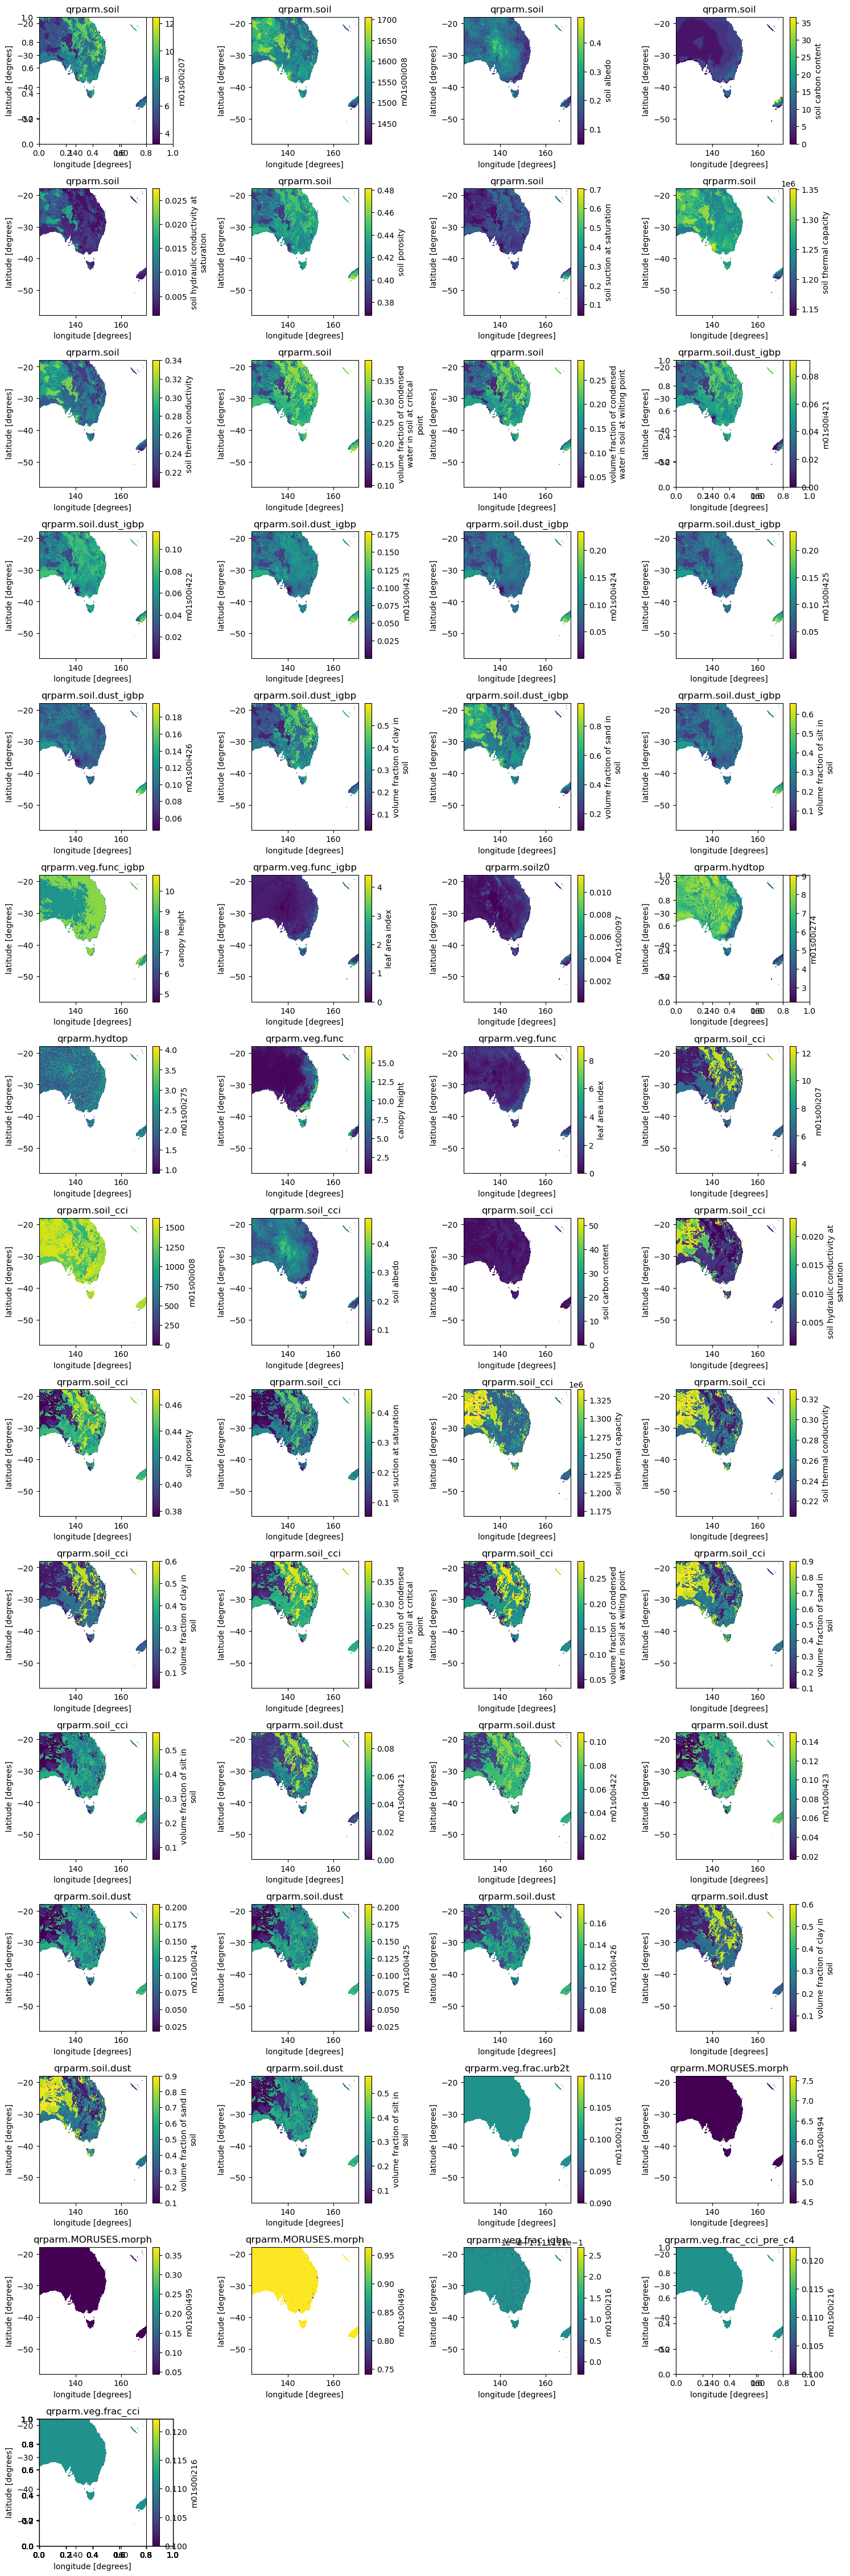

In [92]:
# Now search for nans outside land sea mask
fig = plt.figure(figsize=(fig_width,fig_height))
k = 0
for file in files:
    try:
        cubes = ants.load(file)
    except:
        print (f'ERROR : Unable to open {file}')
        continue

    # Loop over all variables in cube
    for cube in cubes:
        ax = fig.add_subplot(num_rows, num_columns, Position[k])

        if len(cube.shape) > 2: 
            # Need to reduce dimension
            cube = collapse_cube(file,cube)
            
        da = xr.DataArray.from_iris(cube)
        if 'standard_name' in da.attrs.keys():
            split = textwrap.wrap(da.attrs['standard_name'].replace('_',' '),max_label_length)
            label = '\n'.join(split)
            cb_args = {'label': label}
        else:
            cb_args = {'label':da.attrs['STASH']}

        # Search for nans outside land/sea mask
        nan_mask = (da.isnull()  & sea_mask)
        unique = np.unique(da.where(~nan_mask).values)
        if np.isnan(unique).any():
            print (f'{cube.name()} has NaNs on land')
            da.plot(ax=ax,cbar_kwargs=cb_args)
            ax.set_title(file.name)
            k += 1

plt.tight_layout()

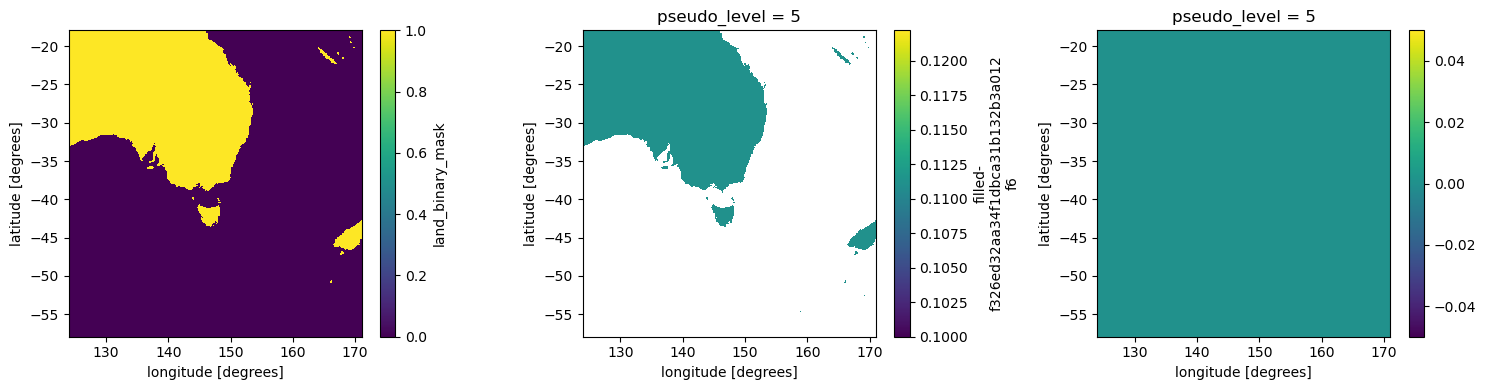

In [108]:
fig,ax=plt.subplots(1,3,figsize=(15,4))
sea_mask.plot(ax=ax[0])
da.plot(ax=ax[1])
nan_mask = (da.isnull()  & sea_mask)
nan_mask.plot(ax=ax[2])
plt.tight_layout()

In [106]:
unique = np.unique(da.where(~nan_mask).values)
unique

array([0.11111111, 0.11111111, 0.11111111, 0.11111111,        nan])

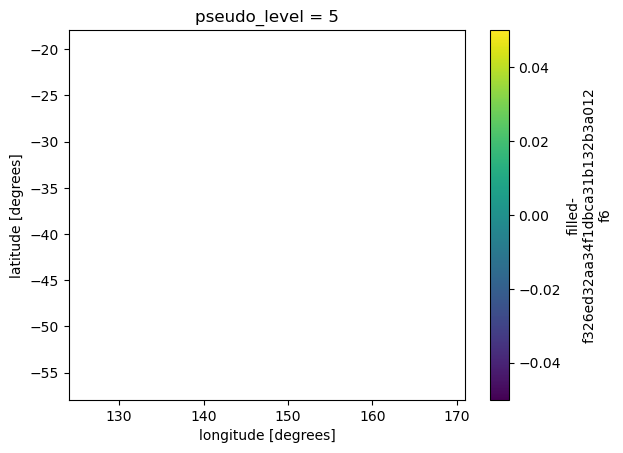

In [116]:
da.where(~sea_mask).plot()

In [ ]:
# Ok let's fix this properly by looking at at small slice near Port Phillip Bay
